In [5]:
import numpy as np
import matplotlib.pyplot as plt
from Bio import AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator
from io import StringIO

/home/paulinamasser/miniconda3/envs/filogenia/lib/python3.9/site-packages/numpy/_core/getlimits.py:545: UserWarning: Signature b'\x00\xd0\xcc\xcc\xcc\xcc\xcc\xcc\xfb\xbf\x00\x00\x00\x00\x00\x00' for <class 'numpy.longdouble'> does not match any known type: falling back to type probe function.
This warnings indicates broken support for the dtype!
  machar = _get_machar(dtype)
Matplotlib is building the font cache; this may take a moment.


In [6]:
# 1. Cargar el alineamiento
aln = AlignIO.read("data/aligned_fixed/proper_alignment.fasta", "fasta")
print(f"Alineamiento con {len(aln)} secuencias de longitud {aln.get_alignment_length()} bp")


Alineamiento con 25 secuencias de longitud 1604 bp


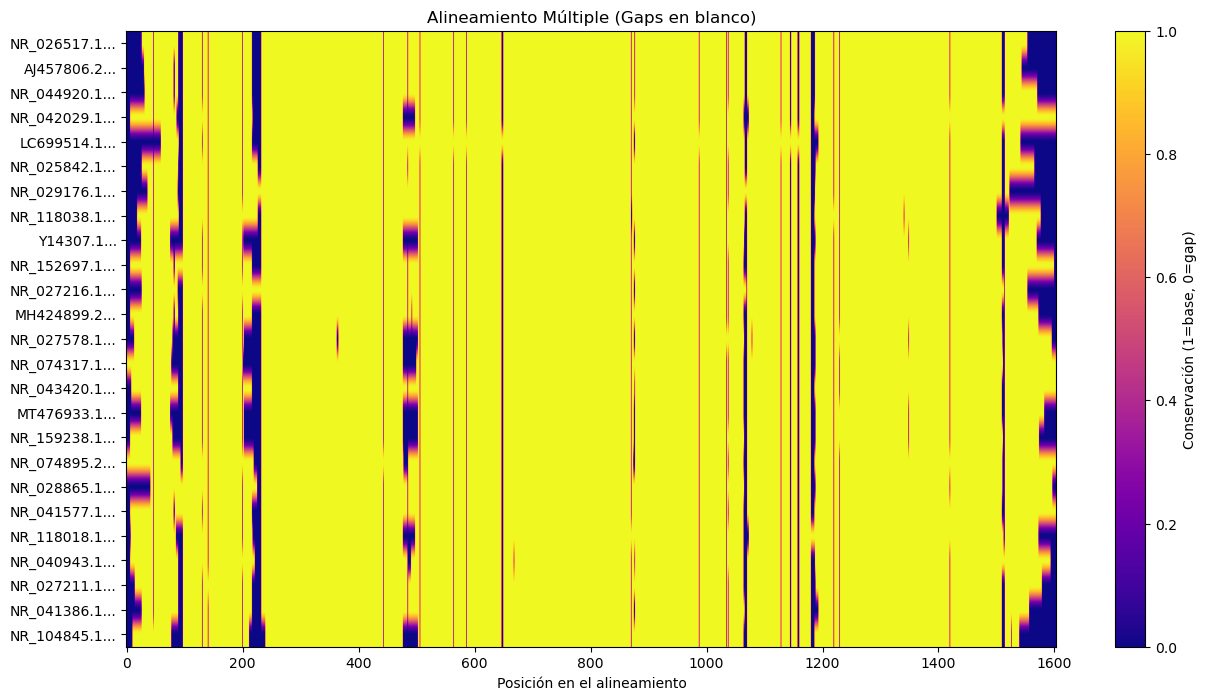

In [9]:
# 2. Visualización matricial (gaps vs. bases)
plt.figure(figsize=(15, 8))
plt.title("Alineamiento Múltiple (Gaps en blanco)")
plt.imshow(
    [[1 if base != '-' else 0 for base in seq] for seq in aln],
    cmap='plasma',
    aspect='auto'
)
plt.yticks(range(len(aln)), [rec.id[:20] + "..." for rec in aln])  # Acorta nombres
plt.xlabel("Posición en el alineamiento")
plt.colorbar(label="Conservación (1=base, 0=gap)");

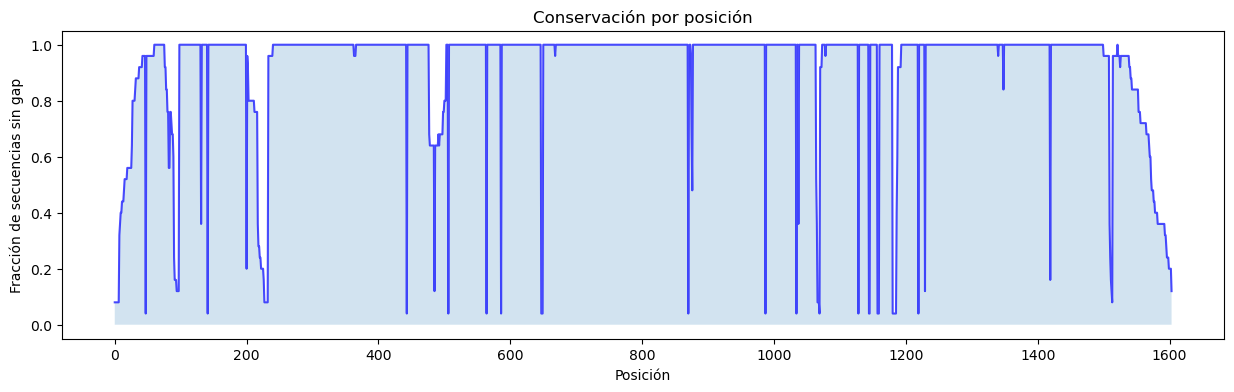

In [8]:
# 3. Perfil de conservación
conservation = np.array([
    [1 if base != '-' else 0 for base in seq] 
    for seq in aln
]).sum(axis=0) / len(aln)

plt.figure(figsize=(15, 4))
plt.plot(conservation, 'b-', alpha=0.7)
plt.fill_between(range(len(conservation)), conservation, alpha=0.2)
plt.title("Conservación por posición")
plt.xlabel("Posición")
plt.ylabel("Fracción de secuencias sin gap");